In [1]:
from ROOT import *

file = TFile.Open("tan1p62.root", "READ")
tree = []
for i in range(20):
    a = file.Get("Position"+str(i+1))
    tree.append(a)

hist = []
for i in range(20):
    h = TH1F("number of photons per run "+str(i+1), "", 1000, 0, 1000)
    hist.append(h)
FZX = []
FY = []

Welcome to JupyROOT 6.26/00


In [2]:
for i in range(len(tree)):
    AZX = []
    AY = []
    for entry in tree[i]:
        hist[i].Fill(entry.N)
        AZX.append(entry.fZX)
        AY.append(entry.fY)
    FZX.append(AZX)
    FY.append(AY)

In [3]:
FZXY = []
for i in range(20):
    S = 0 
    fzxy = []
    for j in range(1000):
        C = []
        for k in range(S, S + int(hist[i].GetBinContent(j+1))):
            S = S + 1
            C.append((FZX[i][k], FY[i][k]))
        fzxy.append(C)
    FZXY.append(fzxy)

In [4]:
FZXY_NEW = []
for i in range(20):
    FZXY_new = []
    for j in range(1000):
        FZXY_new.append(list(set(FZXY[i][j])))
    FZXY_NEW.append(FZXY_new)

In [5]:
Z2D = []
X2D = []

In [6]:
for i in range(20):
    if i%2 == 0:
        S = 0
        for j in range(1000):
            Z = 0.
            for k in range(len(FZXY_NEW[i][j])):
                Z = Z + (4*(floor(FZXY_NEW[i][j][k][0]/0.023)+1)-2)*0.00575*10000
                S = S + 1
            Z2D.append(Z/len(FZXY_NEW[i][j]))
    else:
        G = 0
        for m in range(1000):
            X = 0.
            for n in range(len(FZXY_NEW[i][m])):
                X = X + (4*(floor(FZXY_NEW[i][m][n][0]/0.023)+1)-2)*0.00575*10000
                G = G + 1
            X2D.append(X/len(FZXY_NEW[i][m]))

In [28]:
gStyle.SetOptStat(1)
coor = TCanvas()
hcor = TH1F("hcor", "", 50, -50, 50)
for i in X2D:
    hcor.Fill(i+12.62+1.63)
hcor.Draw()

Warning in <TFile::Append>: Replacing existing TH1: hcor (Potential memory leak).


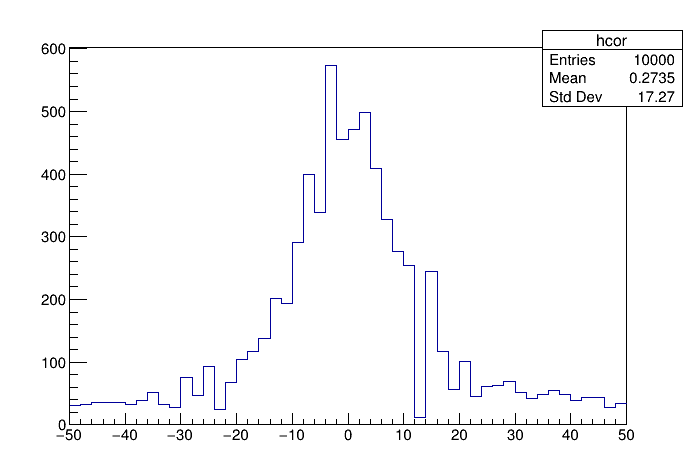

In [29]:
coor.Draw()

In [22]:
LY = TCanvas()
hLY = TH1F("hLY", "", 100, 0, 600)
for i in range(20):
    if i%2==0:
        for j in range(1000):
            hLY.Fill(hist[i].GetBinContent(j))
hLY.Draw()

Warning in <TFile::Append>: Replacing existing TH1: hLY (Potential memory leak).


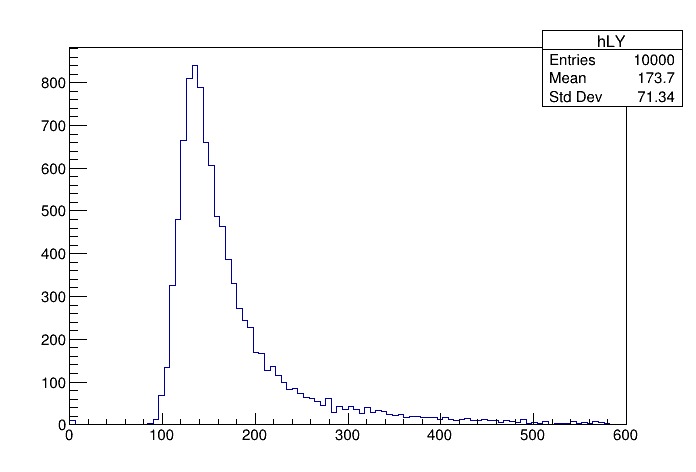

In [23]:
LY.Draw()

In [25]:
LY.SaveAs("G10LY025.C")

Info in <TCanvas::SaveSource>: C++ Macro file: G10LY025.C has been generated


In [19]:
Y = []
delZ = 5
for i in range(10):
    Y.append(-39.4375+(i)*delZ)

In [8]:
layers = []
for i in range(1000):
    l = []
    for j in range(10):
        l.append(list([Z2D[j*1000+i], Y[j]]))
    layers.append(l)

In [9]:
Z_mean = []
for i in range(1000):
    zmean = 0
    for j in range(10):
        zmean = zmean + layers[i][j][0]
    Z_mean.append(zmean/10)

In [10]:
ymean = 0
for i in range(10):
    ymean = ymean + Y[i]
ymean = ymean/10

In [16]:
Z_mean = []
for i in range(1000):
    zmean = 0
    if i not in I1:
        for j in range(10):
            zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/10)
    else:
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/9)

Y_mean = []
for i in range(1000):
    ymean = 0
    if i not in I1:
        for j in range(10):
            ymean = ymean + Y[j]
        Y_mean.append(ymean/10)
    else:
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                ymean = ymean + Y[j]
        Y_mean.append(ymean/9)

In [20]:
Z_mean = []
for i in range(1000):
    zmean = 0
    if i not in I1:
        for j in range(10):
            zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/10)
    elif i in set(I1)-set(I2):
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/9)
    else:
        for j in range(10):
            if j != AA2[I2.index(i)][1].index(0) and j != AA2[I2.index(i)][1].index(max(AA2[I2.index(i)][1])):
                zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/8)

Y_mean = []
for i in range(1000):
    ymean = 0
    if i not in I1:
        for j in range(10):
            ymean = ymean + Y[j]
        Y_mean.append(ymean/10)
    elif i in set(I1)-set(I2):
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                ymean = ymean + Y[j]
        Y_mean.append(ymean/9)
    else:
        for j in range(10):
            if j != AA2[I2.index(i)][1].index(0) and j != AA2[I2.index(i)][1].index(max(AA2[I2.index(i)][1])):
                ymean = ymean + Y[j]
        Y_mean.append(ymean/8)

In [11]:
import math

In [12]:
angles = []
k = []
for i in range(1000):
    denom = 0
    numer = 0
    for j in range(10):
        numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - ymean)
        denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
    angles.append((180/math.pi)*math.atan(numer/denom))
    k.append(numer/denom)

In [13]:
b = []
for i in range(1000):
    Y = 0 
    X = 0
    for j in range(10):
        Y = Y + layers[i][j][1]
        X = X + layers[i][j][0]
    b.append((Y-k[i]*X/1000)/10)

chi = []
for i in range(1000):
    c = 0
    for j in range(10):
        c = c + (layers[i][j][1] - k[i]*layers[i][j][0]/1000 - b[i])**2
    chi.append(c)

AA1 = []
I1 = []
for i in range(1000):
    if chi[i] > 0.1:
        A = []
        for j in range(10):
            c = (layers[i][j][1] - k[i]*layers[i][j][0]/1000 -b[i])**2
            A.append(c)
        AA1.append([i,A])
        I1.append(i)

In [17]:
angles2 = []
k1 = []
s = 0
for i in range(1000):
    if i not in I1:
        denom = 0
        numer = 0
        for j in range(10):
            numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
            denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles2.append((180/math.pi)*math.atan(numer/denom))
    else:
        denom = 0
        numer = 0
        for j in range(10):
            if j != AA1[s][1].index(max(AA1[s][1])):
                numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
                denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles2.append((180/math.pi)*math.atan(numer/denom))
        k1.append(numer/denom)
        s = s + 1

In [18]:
b1 = []
ss = 0
for i in range(len(I1)):
    Y = 0 
    X = 0
    for j in range(10):
        if j != AA1[ss][1].index(max(AA1[ss][1])):
            Y = Y + layers[I1[i]][j][1]
            X = X + layers[I1[i]][j][0] #NOT i 
    b1.append((Y-k1[i]*X/1000)/9)
    ss = ss + 1

chi1 = []
sss = 0
for i in range(len(I1)):
    c = 0
    for j in range(10):
        if j != AA1[sss][1].index(max(AA1[sss][1])):
            c = c + (layers[I1[i]][j][1] - k1[i]*layers[I1[i]][j][0]/1000 - b1[i])**2
    chi1.append(c)
    sss = sss + 1

AA2 = []
I2 = []
for i in range(len(chi1)):
    if chi1[i] > 0.09:
        A = []
        for j in range(10):
            if j == AA1[i][1].index(max(AA1[i][1])):
                A.append(0)
            else:
                c = (layers[I1[i]][j][1] - k1[i]*layers[I1[i]][j][0]/1000 - b1[i])**2
                A.append(c)
        AA2.append([I1[i],A])
        I2.append(I1[i])

In [21]:
angles3 = []
k2 = []
for i in range(1000):
    if i not in I1:
        denom = 0
        numer = 0
        for j in range(10):
            numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
            denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles3.append((180/math.pi)*math.atan(numer/denom))
    elif i in set(I1)-set(I2):
        denom = 0
        numer = 0
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
                denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles3.append((180/math.pi)*math.atan(numer/denom))
    else:
        denom = 0
        numer = 0
        for j in range(10):
            if j != AA2[I2.index(i)][1].index(0) and j != AA2[I2.index(i)][1].index(max(AA2[I2.index(i)][1])):
                numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
                denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles3.append((180/math.pi)*math.atan(numer/denom))
        k2.append(numer/denom)

In [29]:
can = TCanvas()
hangles = TH1F("han", "", 100, 58, 59)
hangles2 = TH1F("han2", "", 100, 58, 59)
hangles3 = TH1F("han3", "", 100, 58, 59)

for i in range(1000):
    hangles.Fill(angles[i])
    hangles2.Fill(angles2[i])
    hangles3.Fill(angles3[i])

gStyle.SetOptStat(0)
hangles.GetXaxis().SetTitle("incident angle #theta, deg")
hangles.GetXaxis().CenterTitle(True)
hangles.GetXaxis().SetTitleFont(132)
hangles.GetXaxis().SetTitleSize(0.05)
hangles.GetXaxis().SetLabelFont(132)
hangles.GetYaxis().SetLabelFont(132)
hangles.GetXaxis().SetLabelSize(0.05)
hangles.GetYaxis().SetLabelSize(0.05)
hangles.SetLineWidth(2)
hangles.SetLineColor(8)
hangles.SetFillColor(8)
hangles.GetYaxis().SetRangeUser(0, 100)
hangles.Draw()

hangles2.GetXaxis().CenterTitle(True)
hangles2.GetXaxis().SetTitleFont(132)
hangles2.GetXaxis().SetTitleSize(0.05)
hangles2.GetXaxis().SetLabelFont(132)
hangles2.GetYaxis().SetLabelFont(132)
hangles2.GetXaxis().SetLabelSize(0.05)
hangles2.GetYaxis().SetLabelSize(0.05)
hangles2.SetLineWidth(2)
hangles2.SetLineColor(kRed)
hangles2.SetFillColorAlpha(kRed, 0.35)
hangles2.Draw("SAME")

hangles3.GetXaxis().CenterTitle(True)
hangles3.GetXaxis().SetTitleFont(132)
hangles3.GetXaxis().SetTitleSize(0.05)
hangles3.GetXaxis().SetLabelFont(132)
hangles3.GetYaxis().SetLabelFont(132)
hangles3.GetXaxis().SetLabelSize(0.05)
hangles3.GetYaxis().SetLabelSize(0.05)
hangles3.SetLineWidth(2)
hangles3.SetLineColor(kBlue)
hangles3.SetFillColorAlpha(kBlue, 0.2)
hangles3.Draw("SAME")

Warning in <TFile::Append>: Replacing existing TH1: han (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: han2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: han3 (Potential memory leak).


In [34]:
f = TF1("f", "gaus", 58, 59)
hangles3.Fit("f")

 FCN=114.288 FROM MIGRAD    STATUS=CONVERGED      93 CALLS          94 TOTAL
                     EDM=7.6711e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.62674e+01   3.35964e+00   1.18373e-02   1.10232e-04
   2  Mean         5.85177e+01   1.76740e-03   2.79034e-05  -9.30858e-02
   3  Sigma        5.18774e-02   1.94725e-03   3.31049e-05   5.62971e-02


Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResu

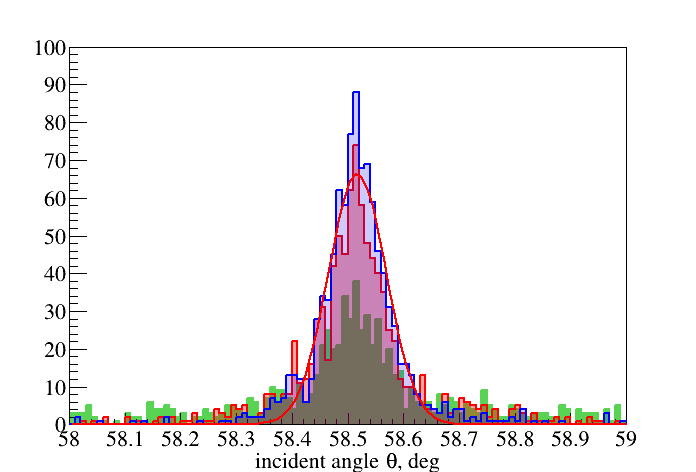

In [35]:
can.Draw()

In [28]:
can.Print("10GeVang.C")

Info in <TCanvas::SaveSource>: C++ Macro file: 10GeVang.C has been generated


In [31]:
a = []
for i in range(100):
    a.append(hangles.GetBinContent(i+1))
s = 0
for i in range(100):
    if hangles.GetBinContent(i+1) > max(a)/2:
        s = s + hangles.GetBinContent(i+1)
        print(i+1, hangles.GetBinContent(i+1))
print(s)

46 21.0
47 25.0
48 20.0
49 21.0
50 34.0
51 28.0
52 38.0
53 25.0
54 29.0
55 21.0
56 28.0
58 20.0
310.0


In [32]:
a = []
for i in range(100):
    a.append(hangles2.GetBinContent(i+1))
s = 0
for i in range(100):
    if hangles2.GetBinContent(i+1) > max(a)/2:
        s = s + hangles2.GetBinContent(i+1)
        print(i+1, hangles2.GetBinContent(i+1))
print(s)

48 42.0
49 50.0
50 45.0
51 62.0
52 74.0
53 58.0
54 48.0
55 44.0
56 40.0
463.0


In [33]:
a = []
for i in range(100):
    a.append(hangles3.GetBinContent(i+1))
s = 0
for i in range(100):
    if hangles3.GetBinContent(i+1) > max(a)/2:
        s = s + hangles3.GetBinContent(i+1)
        print(i+1, hangles3.GetBinContent(i+1))
print(s)

48 45.0
49 62.0
50 58.0
51 77.0
52 88.0
53 68.0
54 69.0
55 59.0
56 46.0
572.0


In [8]:
tan1p62 = TH2F("tan1p62", "", 400, -25, 25, 400, -19, 31)
for i in range(len(Z2D)):
    tan1p62.Fill(X2D[i]/1000+13.892031391682115/1000, Z2D[i]/1000+13.892031391682115/1000)

In [ ]:
c3 = TCanvas()
tan1p62.Draw("COLZ")

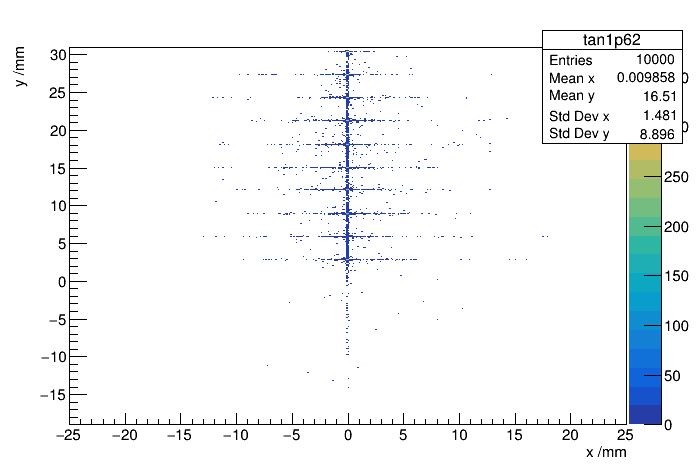

In [20]:
c3.Draw()

In [21]:
myFile = TFile.Open("2Ds.root", "UPDATE")
myFile.WriteObject(tan1p62, "tan1p62")

8736

In [22]:
myFile.Close()